In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn import metrics

In [2]:
# Getting relevant data in form of structured Data Frames
#udata = pd.DataFrame(pd.read_csv('data_unmodified_0.2x0.2_0.001.txt'))
#udata = udata.drop(['j'], axis = 1)
#udata.sort_values(by=['theta'], inplace=True)
#udata['theta'] = udata['theta'].apply(np.floor)
#udata.dropna(inplace=True)
#udata.drop_duplicates(['theta'], inplace=True)
#udata.set_index('theta', inplace = True)

#cdata = pd.DataFrame(pd.read_csv('data_cont_modified_0.2x0.2_0.0007_lowtimestep.txt'))

data = pd.DataFrame(pd.read_csv('data_modified_0.2x0.2_0.001_complete_0.3.txt'))
data = data.drop(['j'], axis = 1)
data.sort_values(by=['theta'], inplace=True)
data['theta'] = data['theta'].apply(np.floor)
data.dropna(inplace=True)
data.drop_duplicates(['theta'], inplace=True)
#exp_data = pd.read_csv('thesis data')
#exp_data.sort_values(by=['theta'], inplace=True)
#exp_data['theta'] = exp_data['theta'].apply(np.floor)
#exp_data.set_index('theta', inplace=True)
for i in data.index:
    if data['theta'][i]%2 == 0:
        data['theta'][i] += 1
data.set_index('theta', inplace = True)
data

,alpha,alpha_dot,alpha_ml,alpha_md,v_rel,cts,fts
theta,,,,,,,
1.0,0.558085,-0.514032,33.2553,32.7888,18.7427,-0.066561,-137.793
1.0,0.557544,-0.533162,33.2519,32.7752,18.6179,-0.067501,-137.884
3.0,0.556438,-0.573438,33.2456,32.7479,18.3664,-0.069428,-138.016
3.0,0.555836,-0.590352,33.2357,32.7289,18.2390,-0.070389,-137.992
5.0,0.555120,-0.993159,33.6140,32.9526,18.0205,-0.076622,-146.632
...,...,...,...,...,...,...,...
6847.0,0.312195,-2.761750,20.8829,19.7817,18.0746,0.148543,285.979
6849.0,0.307822,-3.137010,20.8282,19.6548,18.0814,0.140455,270.613
6849.0,0.303712,-2.936780,20.4891,19.3539,18.0838,0.137153,264.319


In [3]:
cdata.sort_values(by=['time'], inplace=True)
cdata.dropna(inplace=True)
cdata.set_index('time', inplace=True)

In [4]:
cdata_ne = cdata.loc[(cdata['x_location']==1.56984) & (cdata['y_location']==1.50009)]
cdata_se = cdata.loc[(cdata['x_location']==1.56984) & (cdata['y_location']==-1.50009)]
cdata_nw = cdata.loc[(cdata['x_location']==-1.44692) & (cdata['y_location']==1.50009)]
cdata_sw = cdata.loc[(cdata['x_location']==-1.44692) & (cdata['y_location']==-1.50009)]

In [5]:
cdata_ne.insert(4,"vel_mag",((cdata_ne['x_velocity'])**2 + (cdata_ne['y_velocity'])**2)**0.5, True)
cdata_se.insert(4,"vel_mag",((cdata_se['x_velocity'])**2 + (cdata_se['y_velocity'])**2)**0.5, True)
cdata_nw.insert(4,"vel_mag",((cdata_nw['x_velocity'])**2 + (cdata_nw['y_velocity'])**2)**0.5, True)
cdata_sw.insert(4,"vel_mag",((cdata_sw['x_velocity'])**2 + (cdata_sw['y_velocity'])**2)**0.5, True)

In [6]:
names = []
for i in range(20):
    names.append('iteration_' + str(i))

for i in range(20):
    rang_init = 360*(i-1)
    rang_close = 360*i
    names[i] = data[rang_init:rang_close]
    names[i].index = names[i].index%360
    names[i] = names[i][~names[i].index.duplicated(keep='first')]

In [7]:
final = sum(names[13:18])/5
final_cont = final.copy(deep=True)
final_cont.index = final_cont.index+360
final = final.append(final_cont)
final.index = final.index - 240

In [8]:
def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

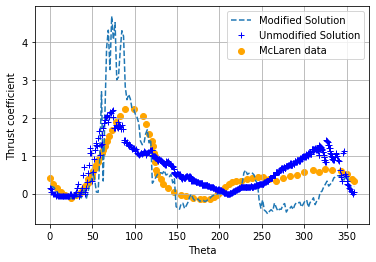

In [9]:
plt.plot(final[0:360]['fts']/(23.94*25), '--', label= "Modified Solution")
#plt.plot(smooth(final[0:360]['fts']/(23.94*25), 10), '--', label= "Moving average of simulation data")
plt.scatter(exp_data.index,exp_data['fts'], label = "McLaren data",linewidth=1, color='orange')
plt.plot((udata[1440:2040].index-240)%360,udata[1440:2040]['ft']/(23.94*25), '+', label='Unmodified Solution', color='blue')
plt.grid('on')
plt.xlabel('Theta')
plt.ylabel('Thrust coefficient')
plt.legend()

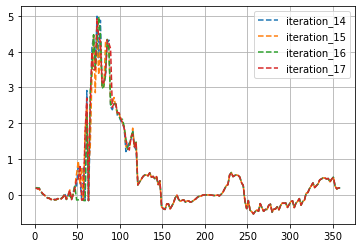

In [10]:
for i in range(14,18):
    name_i_cont = names[i].copy(deep=True)
    name_i_cont.index = name_i_cont.index+360
    names[i] = names[i].append(final_cont)
    names[i].index = names[i].index - 240
    plt.plot(names[i][0:360]['fts']/(23.94*25),'--', label = 'iteration_' + str(i))
    plt.legend()
plt.grid('on')

In [11]:
fts_data = final[0:360].drop(columns=['alpha','alpha_dot','alpha_ml','alpha_md','v_rel','cts'])
fts_data['fts'] = fts_data['fts']/(23.94*25)

In [20]:
err_data = fts_data -  exp_data
err_data.dropna(inplace = True)
#plt.plot(err_data)
#sum(err_data['fts'])
avg_err = np.mean(abs(err_data['fts']))
#np.sqrt(np.mean(err_data['fts']**2))
avg_err

0.4731132153500677

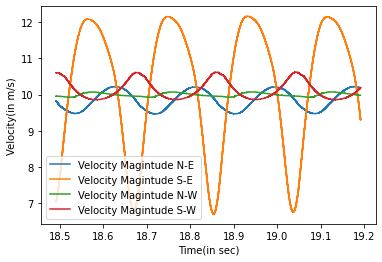

In [13]:
plt.plot(cdata_ne['vel_mag'],label='Velocity Magintude N-E')
plt.plot(cdata_se['vel_mag'],label='Velocity Magintude S-E')
plt.plot(cdata_nw['vel_mag'],label='Velocity Magintude N-W')
plt.plot(cdata_sw['vel_mag'],label='Velocity Magintude S-W')
plt.xlabel('Time(in sec)')
plt.ylabel('Velocity(in m/s)')
plt.legend()

In [19]:
#plt.plot(udata[1320:1680]['ft'])
#udata[1320:1620]
ufts_data = udata[1320:1680].drop(columns=['alpha','v_rel','ct'])
ufts_data['ft'] = ufts_data['ft']/(23.94*25)
ufts_data = ufts_data.rename(columns={'ft':'fts'})
#ufts_data.drop('ft', axis = 1)
ufts_data.index = ufts_data.index -1320
uerr_data = ufts_data -  exp_data
uerr_data.dropna(inplace = True)
#plt.plot(err_data)
#sum(err_data['fts'])
#uavg_err = sum(uerr_data['fts'])/len(uerr_data['fts'])
#uavg_err
#np.sqrt(np.mean(uerr_data['fts']**2))
np.mean(abs(uerr_data['fts']))

0.3346769714783284

In [15]:
w = 10
r = 1.6
n = 3
u_inf = 10

integral_fts = metrics.auc(fts_data.index,fts_data['fts'])
integral_ufts = metrics.auc(ufts_data.index,ufts_data['fts'])
integral_exp = metrics.auc(exp_data.index,exp_data['fts'])
Pt_fts = w*r*3*(integral_fts*24.5/360)
Pt_ufts = w*r*3*(integral_ufts*24.5/360)
Pt_exp = w*r*3*(integral_exp*24.5/360)
Pn = 0.5*1.225*10*10*10*2*r
np.array([Pt_exp, Pt_ufts, Pt_fts])/Pn
#np.mean(fts_data['fts'])
#(Pt_fts - Pt_exp)/Pt_exp

array([0.33831008, 0.390642  , 0.27429974])

In [16]:
max_theta = data['theta'].iloc[len(data['theta'])-1]
iterations = np.floor(max_theta/360)
data['theta'] = data['theta'].apply(lambda x: x%360)
phase_dict = {}
names = ['theta']
#for i in range(iterations):
#    names.append('iteration_' + str(i))



array([  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,
        26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,
        52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,
        78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102,
       104, 106, 108, 110, 112, 114, 116, 118, 120, 122, 124, 126, 128,
       130, 132, 134, 136, 138, 140, 142, 144, 146, 148, 150, 152, 154,
       156, 158, 160, 162, 164, 166, 168, 170, 172, 174, 176, 178, 180,
       182, 184, 186, 188, 190, 192, 194, 196, 198, 200, 202, 204, 206,
       208, 210, 212, 214, 216, 218, 220, 222, 224, 226, 228, 230, 232,
       234, 236, 238, 240, 242, 244, 246, 248, 250, 252, 254, 256, 258,
       260, 262, 264, 266, 268, 270, 272, 274, 276, 278, 280, 282, 284,
       286, 288, 290, 292, 294, 296, 298, 300, 302, 304, 306, 308, 310,
       312, 314, 316, 318, 320, 322, 324, 326, 328, 330, 332, 334, 336,
       338, 340, 342, 344, 346, 348, 350, 352, 354, 356, 358])

In [6]:
theta_force = {}
theta_vel = {}
theta_vel_all ={}
theta_alpha = {}
theta_alpha_last = {}
theta_alpha_ml = {}
theta_alpha_md = {} 
theta_alpha_cur = {}
theta_force_cur = {}
theta_cts = {}
theta_cts_cur = {}
for i in range(len(data_array)):
    value = int((data_array[i][0]))
    value_limit = int((data_array[i][0])%360)
    theta_force[value] = data_array[i][4]#[7]
    theta_force_cur[value_limit] = data_array[i][4]
    theta_vel[value_limit] = data_array[i][2]#[5]
    theta_alpha_cur[value_limit] = data_array[i][1]#[5]
    theta_vel_all[value] = data_array[i][2]
    theta_alpha[value] = data_array[i][1]
    theta_cts[value] = data_array[i][3]
    theta_cts_cur[value_limit] = data_array[i][3]
#    theta_alpha_last[value] = data_array[i][2]
#    theta_alpha_ml[value] = data_array[i][3]
#    theta_alpha_md[value] = data_array[i][4]


In [9]:
# Sepearting Data For Operations

theta = list(dict.keys(theta_force))
theta_limit = list(dict.keys(theta_vel))
fts = list(dict.values(theta_force))
fts_cur = list(dict.values(theta_force_cur))
vel = list(dict.values(theta_vel))
alpha = list(dict.values(theta_alpha))
alpha_cur = list(dict.values(theta_alpha_cur))
cts = list(dict.values(theta_cts))
cts_cur = list(dict.values(theta_cts_cur))
#alpha_ml = list(dict.values(theta_alpha_ml))
#alpha_md = list(dict.values(theta_alpha_md))

#alpha_dot = ((np.array(alpha) - np.array(alpha_last))/0.003)


SyntaxError: invalid syntax (<ipython-input-12-5ba75ff6e3ba>, line 1)

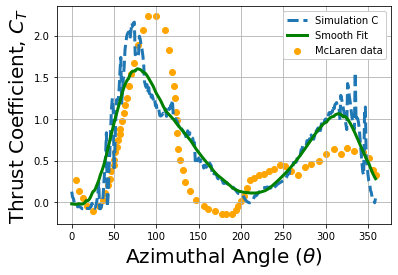

In [19]:
#plt.plot(theta,np.array(fts))
#plt.plot(theta,np.array(cts))
#plt.scatter(theta_limit,np.array(alpha_cur))
#plt.xlabel("theta")
#plt.ylabel("ct")
#plt.ylabel("Ft")
#plt.ylabel("alpha")
#plt.ylabel("alpha_dot")

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

lists = sorted(theta_force.items()) # sorted by key, return a list of tuples

x, y = zip(*lists) # unpack a list of pairs into two tuples

plt.plot(np.array(x[1320:1680])-1320, np.array(y[1320:1680])/(23.94*25), '--' ,label = "Simulation C", linewidth=3 )
plt.plot(np.array(x[1320:1680])-1320, smooth(np.array(y[1320:1680])/(23.94*25), 50), 'g-' ,label = "Smooth Fit", linewidth=3 )
plt.scatter(exp_data['theta'], exp_data['value'], label = "McLaren data",linewidth=1, color='orange')
plt.legend(framealpha=1, frameon=True)
plt.xlabel('Azimuthal Angle (' + r'$\theta$' + ')', fontsize=20)
plt.ylabel('Thrust Coefficient, ' + r'$C_T$', fontsize=20)
plt.grid()

In [6]:
exp_data_rd = exp_data.round({'theta' : 0})
error = 0
total = 0
for val in range(76):
    theta = exp_data.iloc[val][0]
    error = error + (exp_data.iloc[val][1] - (fts[int(theta) + 1320])/(25*23.94))
    total = total + exp_data.iloc[val][1]
    #print(exp_data.iloc[val][1], (fts[int(theta) + 1320])/(25*23.94))
print(error*25*23.94, total*25*23.94, error/total)

NameError: name 'fts' is not defined

In [6]:
*#setting up constants for the calculation
w = 10
r = 1.4
n = 3
u_inf = 10

# calculating Pt
integral = 0

force = y[2005:2555]

for j in range(len(force)-1):
    Fdtheta = (fts_cur[j+1] + fts_cur[j])*(theta[j+1] - theta[j])/50
    integral += Fdtheta

tot_dtheta = x[20005] - x[2555]

Pt = w*r*3*(integral/tot_dtheta)

#Calculating Pn

Pn = 0.5*1.225*10*10*10*2*r*1
Pt/Pn

IndexError: tuple index out of range

In [7]:
x[1320]

1320

In [ ]:
z = np.polyfit(x[1320:1500],y[1320:1500],2)
p = np.poly1d(z)

plt.plot(x[1320:1500],p(x[1320:1500]))